In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tqdm import tqdm

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Data

In [3]:
# readinging data

data = pd.read_csv('data.csv')

In [4]:
data.tail()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
91995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9


In [5]:
data.isna().sum().sum()

0

In [6]:
# number of images for each image
data.character.value_counts()

character_09_jha             2000
digit_2                      2000
character_19_dha             2000
character_04_gha             2000
character_01_ka              2000
digit_6                      2000
character_32_patalosaw       2000
character_03_ga              2000
character_31_petchiryakha    2000
character_36_gya             2000
character_34_chhya           2000
character_22_pha             2000
digit_4                      2000
digit_9                      2000
character_14_dhaa            2000
character_10_yna             2000
digit_8                      2000
character_24_bha             2000
character_12_thaa            2000
character_17_tha             2000
character_20_na              2000
digit_1                      2000
digit_7                      2000
digit_5                      2000
character_28_la              2000
character_25_ma              2000
character_16_tabala          2000
character_08_ja              2000
character_15_adna            2000
character_33_h

We can see that there are 2000 images for each character

In [7]:
# separating images and labels
X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]

X_data.shape, y_data.shape

((92000, 1024), (92000,))

# The Images

Each image in the dataset is given as a flattened vector. We want to use convolution layers in our model to preserve the spatial information. Therefore, we will convert the flattened vectors back to the 2-D vector of the image.

In [8]:
X = X_data.values.reshape(X_data.shape[0], 32, 32, 1)
X = X/255      # data normalization

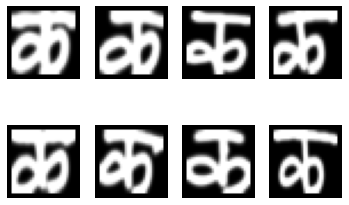

In [9]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X[i-1].reshape(32, 32), cmap='gray')
plt.show()

# The labels

The labels are in text form which cannot be inputed in a neural network, we need to map them to integer values.

In [10]:
labels = np.array(list(enumerate(y_data.unique())))
y_dict = dict(labels)
y_dict_2 = {values:keys for keys, values in y_dict.items()}

y = y_data.map(y_dict_2)


y_dict_2

{'character_01_ka': '0',
 'character_02_kha': '1',
 'character_03_ga': '2',
 'character_04_gha': '3',
 'character_05_kna': '4',
 'character_06_cha': '5',
 'character_07_chha': '6',
 'character_08_ja': '7',
 'character_09_jha': '8',
 'character_10_yna': '9',
 'character_11_taamatar': '10',
 'character_12_thaa': '11',
 'character_13_daa': '12',
 'character_14_dhaa': '13',
 'character_15_adna': '14',
 'character_16_tabala': '15',
 'character_17_tha': '16',
 'character_18_da': '17',
 'character_19_dha': '18',
 'character_20_na': '19',
 'character_21_pa': '20',
 'character_22_pha': '21',
 'character_23_ba': '22',
 'character_24_bha': '23',
 'character_25_ma': '24',
 'character_26_yaw': '25',
 'character_27_ra': '26',
 'character_28_la': '27',
 'character_29_waw': '28',
 'character_30_motosaw': '29',
 'character_31_petchiryakha': '30',
 'character_32_patalosaw': '31',
 'character_33_ha': '32',
 'character_34_chhya': '33',
 'character_35_tra': '34',
 'character_36_gya': '35',
 'digit_0': '36'

In [11]:
y

0         0
1         0
2         0
3         0
4         0
         ..
91995    45
91996    45
91997    45
91998    45
91999    45
Name: character, Length: 92000, dtype: object

In [12]:
# converting y into a one hot vector 

a = np.array(list(y), dtype=int)
if np.max(a)==45:
  y = np.eye(46)[a]  

y.shape

(92000, 46)

# Train-Test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34562)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73600, 32, 32, 1), (18400, 32, 32, 1), (73600, 46), (18400, 46))

# Convolutional Model

In [65]:
model = Sequential([
    Input(shape=(32, 32, 1)),
    Conv2D(30, (4, 4)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(50, (4, 4)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
    
])

In [66]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-10)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 29, 29, 30)        510       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 50)        24050     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 50)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 5, 5, 50)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1250)            

In [67]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Train on 58880 samples, validate on 14720 samples
Epoch 1/30
58880/58880 [==============================] - 5s 88us/sample - loss: 1.3319 - accuracy: 0.6358 - val_loss: 0.4360 - val_accuracy: 0.8741
Epoch 2/30
58880/58880 [==============================] - 5s 78us/sample - loss: 0.4014 - accuracy: 0.8777 - val_loss: 0.2596 - val_accuracy: 0.9213
Epoch 3/30
58880/58880 [==============================] - 5s 80us/sample - loss: 0.2661 - accuracy: 0.9164 - val_loss: 0.2095 - val_accuracy: 0.9379
Epoch 4/30
58880/58880 [==============================] - 5s 79us/sample - loss: 0.2097 - accuracy: 0.9328 - val_loss: 0.1696 - val_accuracy: 0.9493
Epoch 5/30
58880/58880 [==============================] - 5s 79us/sample - loss: 0.1768 - accuracy: 0.9439 - val_loss: 0.1511 - val_accuracy: 0.9552
Epoch 6/30
58880/58880 [==============================] - 5s 80us/sample - loss: 0.1501 - accuracy: 0.9517 - val_loss: 0.1461 - val_accuracy: 0.9568
Epoch 7/30
58880/58880 [==============================] 

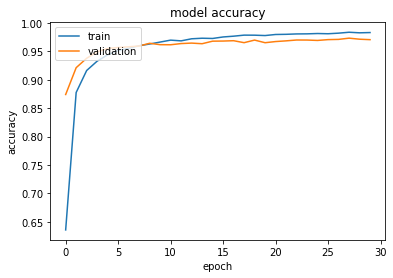

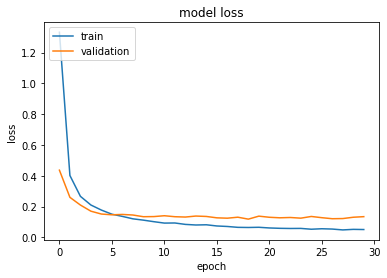

In [68]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [71]:
model.evaluate(X_test, y_test, verbose=2)

18400/18400 - 1s - loss: 0.1201 - accuracy: 0.9718


[0.12014626625285019, 0.9717935]

predicted word:  character_01_ka
actual word:  character_01_ka


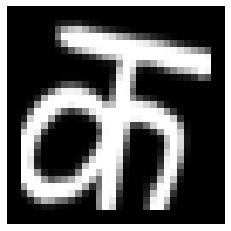

In [96]:
predictions = model.predict(X_test)

i = 436

plt.imshow(X_test[i].reshape(32, 32), cmap='gray')
plt.axis('off')
print('predicted word: ', y_dict[str(np.argmax(predictions[i]))])
print('actual word: ', y_dict[str(np.argmax(y_test[i]))])